<h2 align=center>Ford Go Bike Trip Data</h2>

## Load the Data and Libraries
---

In [30]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import copy
import os
import warnings

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Data overview and check fro nulls 

---

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

(183412, 16)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


## Goals

---

Study the trip duration with differnt ages, and time of the day. Which days require more rides than usual. Study user types and the duration of each type daily and weekly.

# Study
---

In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

we can tell tha we have some missing data for some trips in start and end stations name and ID 
so if all the data is missing we can drop them all 

as well as in some members 

In [6]:
df["current year"]=2022


df['age'] = df['current year'] - df['member_birth_year']

df.drop(["current year","member_birth_year"],axis=1,inplace=True)

df["Request_time"]=pd.to_datetime(df["start_time"], infer_datetime_format=True)
df["Drop_time"]=pd.to_datetime(df["end_time"], infer_datetime_format=True)


df.drop(["end_time","start_time"],axis=1,inplace=True)

df['Trip_Time'] = df['Drop_time'] - df['Request_time']

df.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age,Request_time,Drop_time,Trip_Time
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,38.0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,0 days 14:29:45.830000
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,No,NaN,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,0 days 11:48:41.267000
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,50.0,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,0 days 17:10:54.928000
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,33.0,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,0 days 10:08:10.832000
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,48.0,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,0 days 00:26:25.525000


In [7]:
df_new = df

In [8]:
#extract the day of the week 
df_new['day_of_week'] = pd.DatetimeIndex(df_new['Request_time']).strftime('%A')
#extract the time of the day
df_new['start_hour'] = df_new['Request_time'].apply(lambda time: time.hour)
df_new['time_of_day'] = 'Morning'
df_new['time_of_day'][(df_new['start_hour'] >= 12) & (df_new['start_hour'] <= 17)]='Afternoon'
df_new['time_of_day'][(df_new['start_hour'] >= 18) & (df_new['start_hour'] <= 23)]='Night'

#show the columns
display(df_new[['day_of_week','start_hour','time_of_day']].head())

C:\Users\mahmo\AppData\Local\Temp\ipykernel_18292\1327607767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['time_of_day'][(df_new['start_hour'] >= 12) & (df_new['start_hour'] <= 17)]='Afternoon'
C:\Users\mahmo\AppData\Local\Temp\ipykernel_18292\1327607767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['time_of_day'][(df_new['start_hour'] >= 18) & (df_new['start_hour'] <= 23)]='Night'


,day_of_week,start_hour,time_of_day
0,Thursday,17,Afternoon
1,Thursday,18,Night
2,Thursday,12,Afternoon
3,Thursday,17,Afternoon
4,Thursday,23,Night


Now we can deal with the age andtrip duration overall and be easier to undrrstand it better 

# Data visualisation
---


Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: day_of_week, dtype: int64

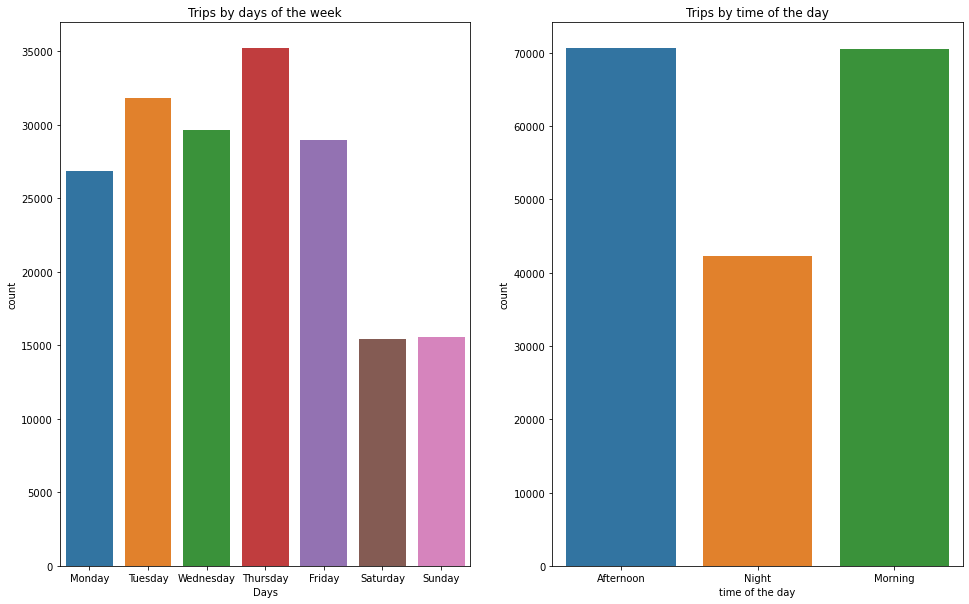

In [9]:
# lets count of trips made in  day of the week 
display(df_new['day_of_week'].value_counts().sort_values(ascending=False))
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# lets plot the distribution
plt.figure(figsize=[25, 10])


plt.subplot(1,3,1)
sns.countplot(data = df_new ,x ='day_of_week' ,order= weekday)
plt.title('Trips by days of the week')
plt.xlabel('Days')




plt.subplot(1,3,2)
sns.countplot(data = df_new ,x ='time_of_day' )
plt.title('Trips by time of the day')
plt.xlabel('time of the day')
plt.show()

Here we can get that thursdays are the most used days and saturdays and sundays are the least most probably because its the weeken

the number of rides in the morning and afternoon are almost the same while night much lower 

In [10]:
df['Trip_Time'].describe()

count                       183412
mean     0 days 00:12:06.577548164
std      0 days 00:29:54.388971051
min         0 days 00:01:01.081000
25%         0 days 00:05:25.428500
50%         0 days 00:08:34.649500
75%         0 days 00:13:16.317000
max         0 days 23:44:04.830000
Name: Trip_Time, dtype: object

In [11]:
df['age'].describe()

count    175147.000000
mean         37.193563
std          10.116689
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: age, dtype: float64

the average of age is 37 which makes sense while the max is not common 

<AxesSubplot:xlabel='age'>

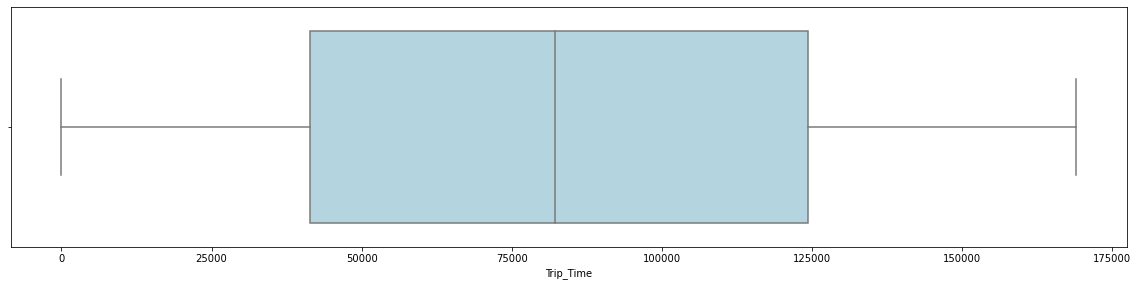

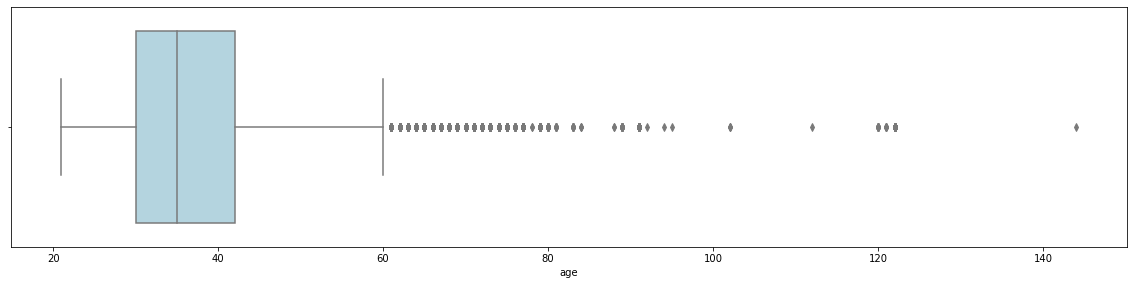

In [12]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['Trip_Time','member_gender','user_type']] = df_encoded.loc[:,['Trip_Time','member_gender','user_type']].apply(LabelEncoder().fit_transform) 


plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df_encoded.Trip_Time, color='lightblue')

plt.figure(figsize= (20,15))
plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='lightblue')

The trip distribution is even there is no outliers

however the age we have some values above 60 and some above 100 which may be a mistake in the data entry 

In [13]:
df[df['start_station_id'].isnull()].head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age,Request_time,Drop_time,Trip_Time,day_of_week,start_hour,time_of_day
475,1709,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,Female,No,31.0,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,0 days 00:28:29.806000,Thursday,20,Night
1733,1272,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,Male,No,42.0,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,0 days 00:21:12.454000,Thursday,18,Night
3625,142,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,Male,No,34.0,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,0 days 00:02:22.902000,Thursday,17,Afternoon
4070,585,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,Male,Yes,38.0,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,0 days 00:09:45.398000,Thursday,16,Afternoon
5654,509,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,Male,Yes,38.0,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,0 days 00:08:29.198000,Thursday,12,Afternoon


In [14]:
df[df['member_gender'].isnull()].head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age,Request_time,Drop_time,Trip_Time,day_of_week,start_hour,time_of_day
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,No,NaN,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,0 days 11:48:41.267000,Thursday,18,Night
13,915,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,No,NaN,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,0 days 00:15:15.805000,Thursday,23,Night
28,650,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,No,NaN,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,0 days 00:10:50.948000,Thursday,23,Night
53,3418,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,No,NaN,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,0 days 00:56:58.001000,Thursday,22,Night
65,926,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,No,NaN,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,0 days 00:15:26.829000,Thursday,23,Night


I don't think the null values will afect the data since the missing in gender are so minor while the rest of the data can be studied normally 

as well as the stations ID wont vary that much 

<AxesSubplot:ylabel='member_gender'>

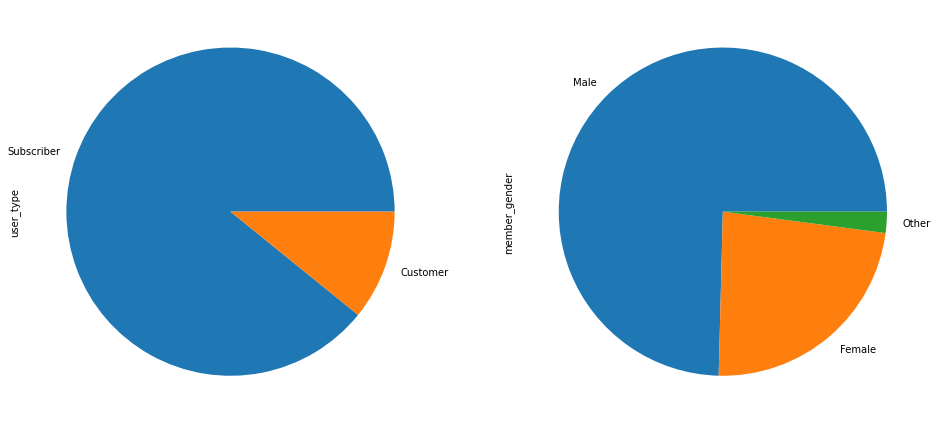

In [15]:
plt.figure(figsize=(25,20))

plt.subplot(1,3,1)
df['user_type'].value_counts().plot(kind = 'pie')

plt.subplot(1,3,2)
df['member_gender'].value_counts().plot(kind = 'pie')



# plt.subplot(1,3,3)
# df['age'].value_counts().plot(kind = 'pie')

Here we can see that most users are subscribers while the rest are casual users of the service which can expected
and most of the trips are made by males and about the quarter are made by females 

In [16]:
df[df["user_type"]=="Customer"].count()

duration_sec               19868
start_station_id           19801
start_station_name         19801
start_station_latitude     19868
start_station_longitude    19868
end_station_id             19801
end_station_name           19801
end_station_latitude       19868
end_station_longitude      19868
bike_id                    19868
user_type                  19868
member_gender              16631
bike_share_for_all_trip    19868
age                        16631
Request_time               19868
Drop_time                  19868
Trip_Time                  19868
day_of_week                19868
start_hour                 19868
time_of_day                19868
dtype: int64

In [17]:
df[df["user_type"]=="Subscriber"].count()

duration_sec               163544
start_station_id           163414
start_station_name         163414
start_station_latitude     163544
start_station_longitude    163544
end_station_id             163414
end_station_name           163414
end_station_latitude       163544
end_station_longitude      163544
bike_id                    163544
user_type                  163544
member_gender              158516
bike_share_for_all_trip    163544
age                        158516
Request_time               163544
Drop_time                  163544
Trip_Time                  163544
day_of_week                163544
start_hour                 163544
time_of_day                163544
dtype: int64

Here to get a specific number for subscribers vs costomers 

In [95]:
# plt.figure(figsize= (20,30))
# plt.subplot(3,1,1)
# sns.scatterplot(df_new.day_of_week, df_new.age,hue=df_new.time_of_day ,alpha=0.6)

In [47]:
def age(x):
    if x >= 18 and x <= 28:
          return 'Youth'
    if x >= 29 and x <= 64:
        return 'Adults'
    if x >= 65:
          return 'Eldery'
    else:
        return x
    
    
df_new['age'] = df_new.age.apply(lambda x: age(x))

df_new.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age,Request_time,Drop_time,Trip_Time,day_of_week,start_hour,time_of_day
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,Adults,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,0 days 14:29:45.830000,Thursday,17,Afternoon
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,No,NaN,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,0 days 11:48:41.267000,Thursday,18,Night
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,Adults,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,0 days 17:10:54.928000,Thursday,12,Afternoon
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,Adults,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,0 days 10:08:10.832000,Thursday,17,Afternoon
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,Adults,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,0 days 00:26:25.525000,Thursday,23,Night


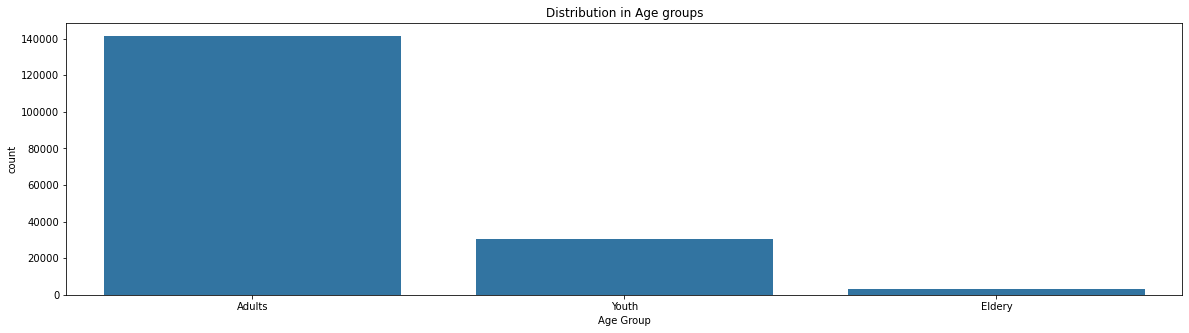

In [90]:
plt.figure(figsize=[20, 5])

color_b = sns.color_palette()[0]
sns.countplot( data = df_new, x ='age', color = color_b)
plt.title('Distribution in Age groups')
plt.xlabel('Age Group')
plt.show()



From this plot we can see most of the users are adults 

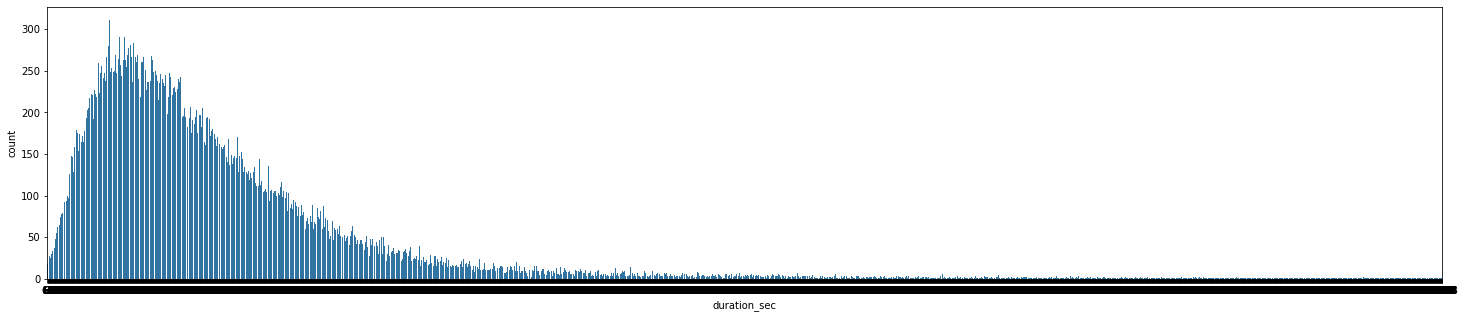

In [94]:
plt.figure(figsize= (25,5))
color_b = sns.color_palette()[0]
sns.countplot( data = df_new, x ='duration_sec', color = color_b)
# plt.title('Distribution in Age groups')
plt.xlabel('duration_sec')
plt.show()

From this shape we can imagine that most of the trips are around the same duration and people don't ride for too long which we described earlier

Text(0, 0.5, 'Trip duration(sec)')

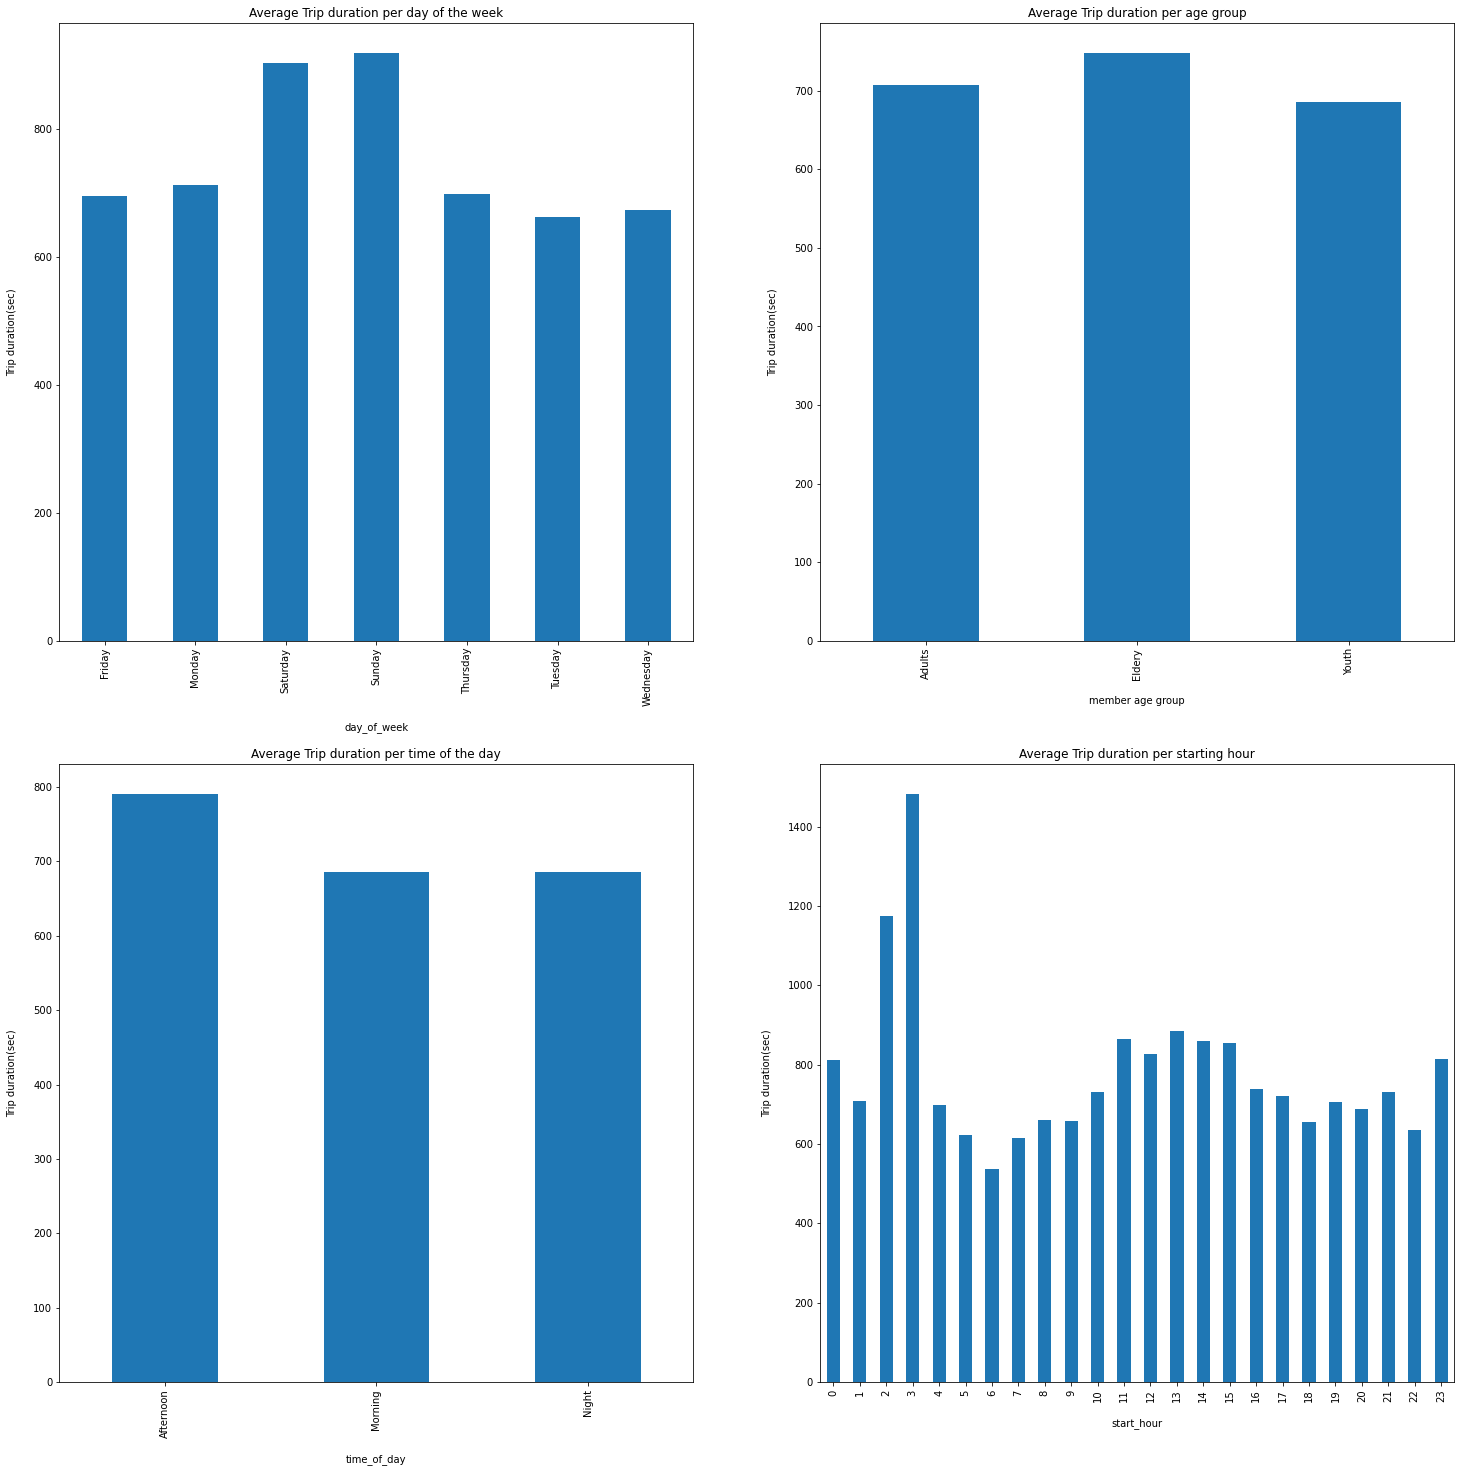

In [80]:
plt.figure(figsize= (25,25))

plt.subplot(2,2,1)
df_new.groupby('day_of_week')['duration_sec'].mean().plot(kind = 'bar')
plt.title('Average Trip duration per day of the week')
plt.xlabel('day_of_week', labelpad = 16)
plt.ylabel('Trip duration(sec)',labelpad = 16)



plt.subplot(2,2,2)
df_new.groupby('age')['duration_sec'].mean().plot(kind = 'bar')
plt.title('Average Trip duration per age group')
plt.xlabel('member age group', labelpad = 16)
plt.ylabel('Trip duration(sec)',labelpad = 16)



plt.subplot(2,2,3)
df_new.groupby('time_of_day')['duration_sec'].mean().plot(kind = 'bar')
plt.title('Average Trip duration per time of the day')
plt.xlabel('time_of_day', labelpad = 16)
plt.ylabel('Trip duration(sec)',labelpad = 16)


plt.subplot(2,2,4)
df_new.groupby('start_hour')['duration_sec'].mean().plot(kind = 'bar')
plt.title('Average Trip duration per starting hour')
plt.xlabel('start_hour', labelpad = 16)
plt.ylabel('Trip duration(sec)',labelpad = 16)

Here we find that the trip duration increase depending on the day,however the sundays and saturdays scor the least rides but shows the longest ride duration, which may be an indication that people ride for fun and no hurry in their trips.

Regarding the second plot it makes sense that elder people take more time in their trips than usual

From the third plot we get that the longst durations happen in the afternoonwhich may be because of trafic at this time

The forth plot ashows the same since the afternoon hours record the the longest durations

Text(0.5, 0, 'start_hour')

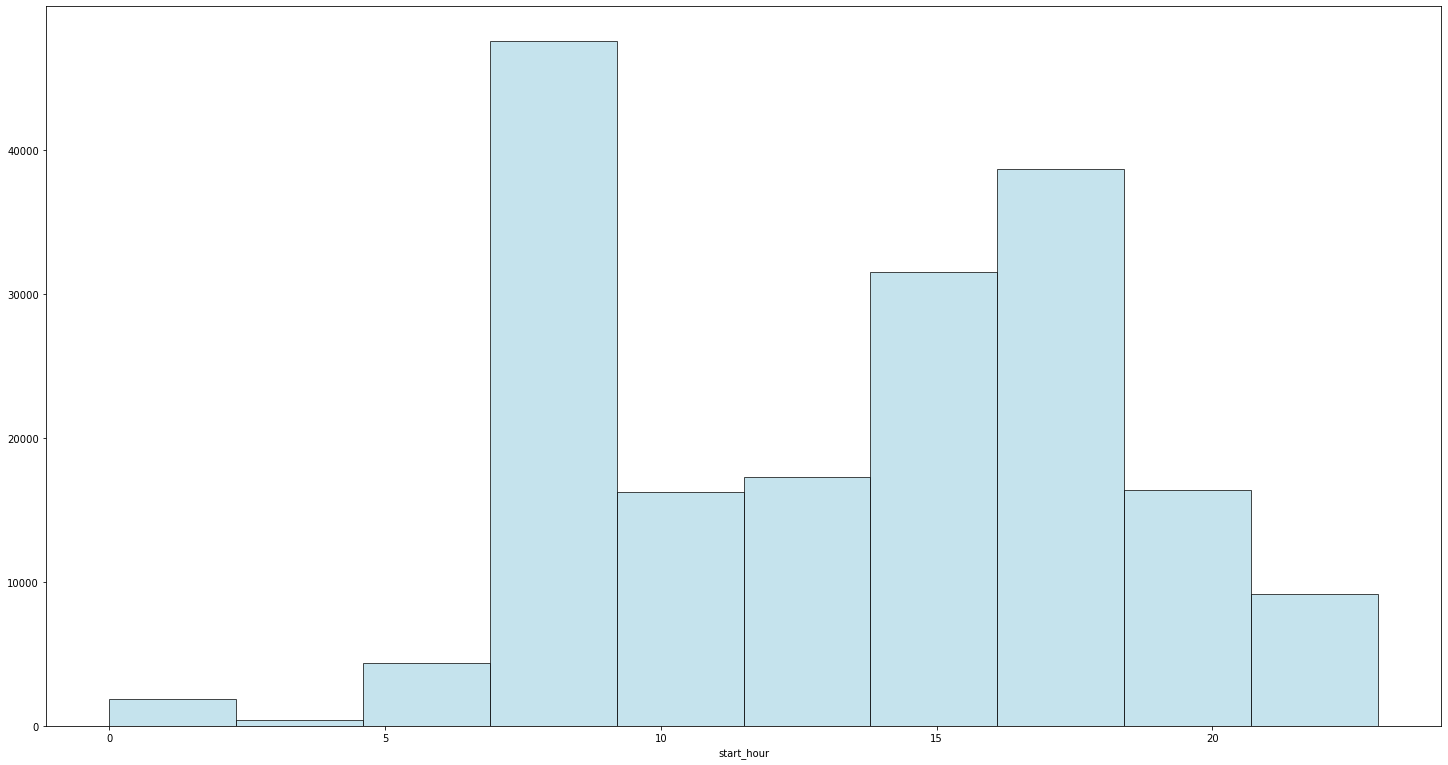

In [75]:
plt.figure(figsize= (25,45))
plt.subplot(3,1,1)
plt.hist(df_new.start_hour, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('start_hour')

This Histogram shows the most hours or the hours people use the service the most

Text(0, 0.5, 'Trip duration(sec)')

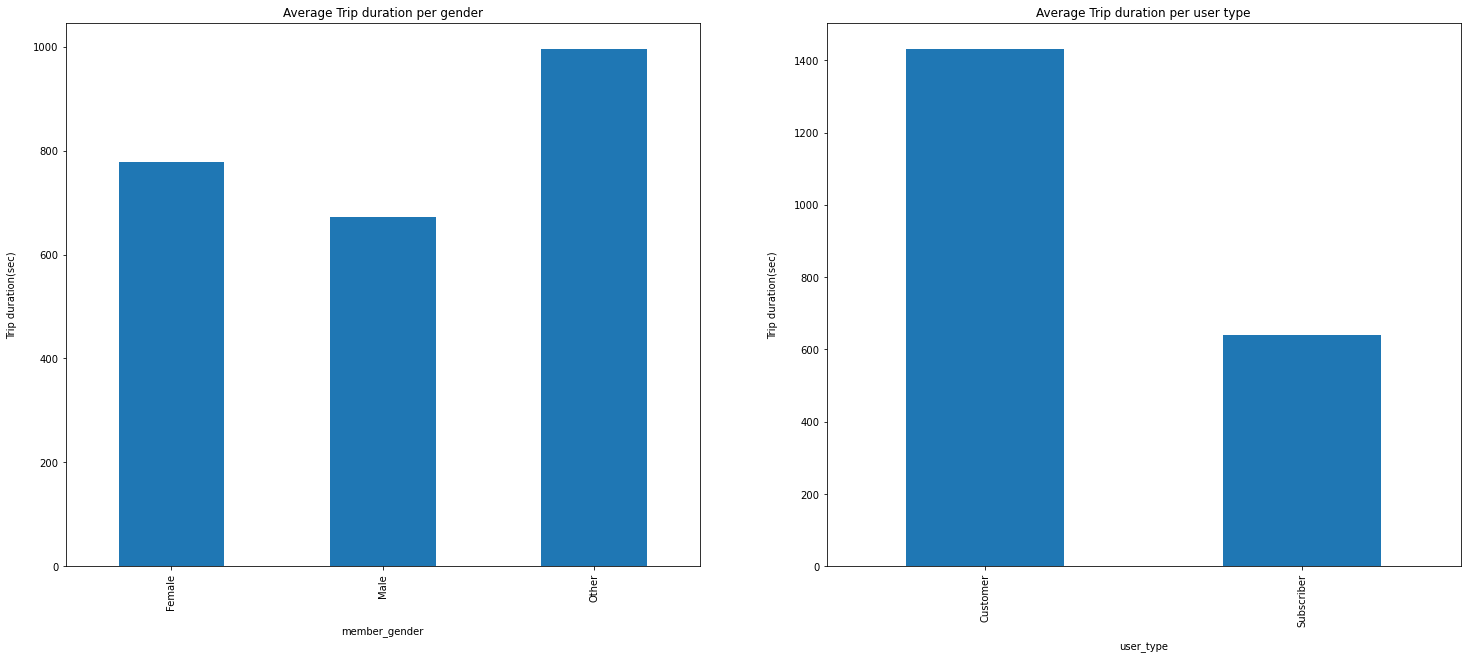

In [111]:
plt.figure(figsize= (25,10))

plt.subplot(1,2,1)
df_new.groupby('member_gender')['duration_sec'].mean().plot(kind = 'bar')
plt.title('Average Trip duration per gender')
plt.xlabel('member_gender', labelpad = 16)
plt.ylabel('Trip duration(sec)',labelpad = 16)



plt.subplot(1,2,2)
df_new.groupby('user_type')['duration_sec'].mean().plot(kind = 'bar')
plt.title('Average Trip duration per user type')
plt.xlabel('user_type', labelpad = 16)
plt.ylabel('Trip duration(sec)',labelpad = 16)


Here we can see that Males take less time in trips than females 

and customers take longer time in trips much more than subscribers which maybe an indication for that subscribers do repititive trips all the week while customers take it every once in a while for long rides

D:\Programming\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week', ylabel='duration_sec'>

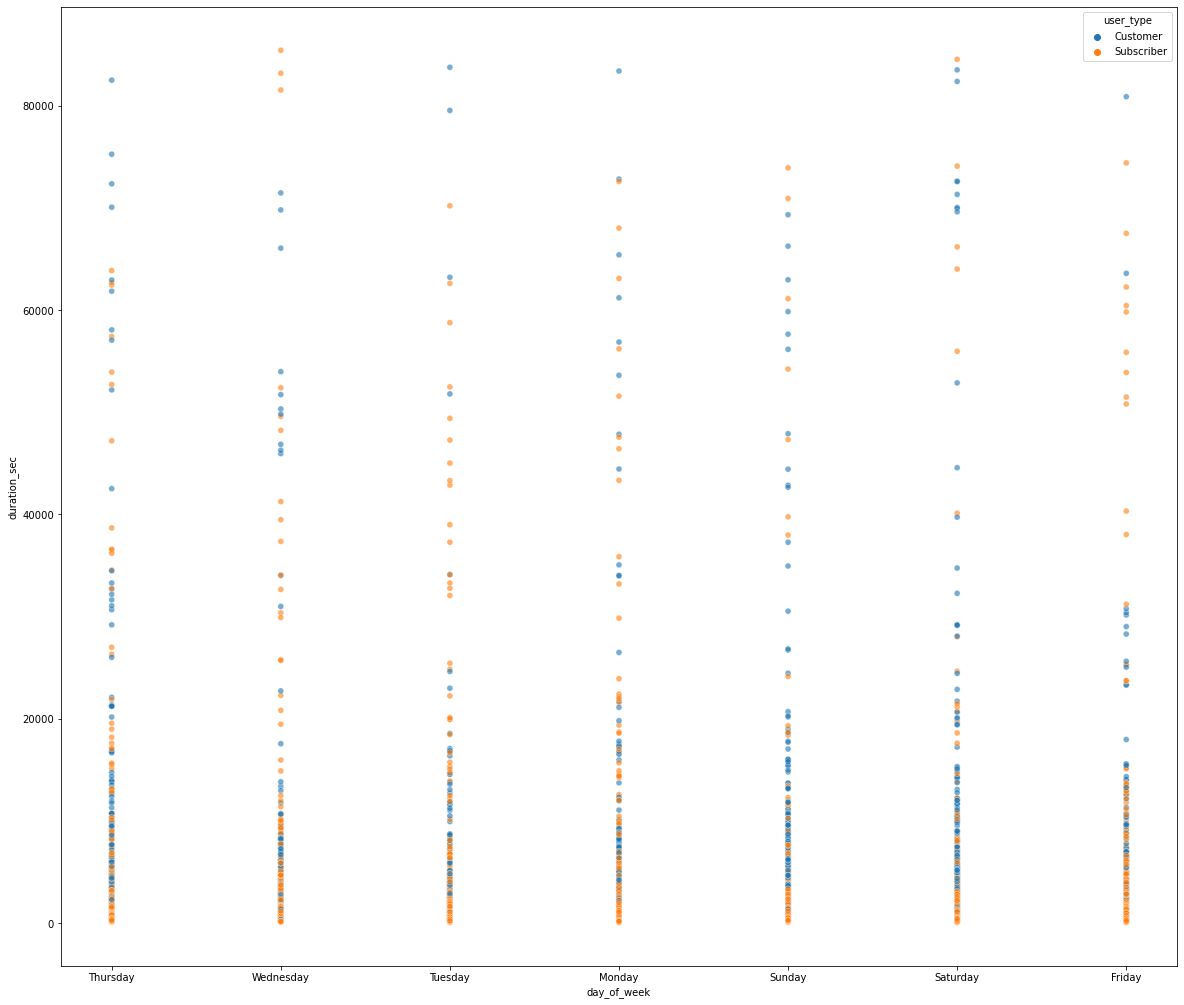

In [119]:
plt.figure(figsize= (20,60))
plt.subplot(3,1,1)
# sns.scatterplot(df_new.day_of_week, df_new.user_type ,alpha=0.6)

sns.scatterplot(df_new.day_of_week, df_new.duration_sec ,hue=df_new.user_type ,alpha=0.6)

From this plot we can deduce that customers use this service only on weekends and shows that most long durations are made by customers and this can link the previous data we studied 

And a lot of customers are shown on thursdays which on of the most user days for this service almost by everyone.

# Conclusion

From this study we can tell the following:


1.Thursdays are the most days the service is used by either customers and subscribers.

2.The overall trips count made at morning and afternoon are almost the same amount than night.

3.Trip average of trip time in about 12 hours per trip while most of the trips are around 13min trip

4.The number of subscribers is so high and shows that a lot of people are depending on the service, while the number of customers is really low and looks like they use the service for fun while the use it on weekends most of the time and the duration is notably higher than average, and they use it on thursdays as well and seems like people need to transport the most on that day.

5.Most of the users shows to be Males, and adults between 29 and 64 years old.

6.It shows a noticable higher duration time at afternoon time maybe because of trafic.
